## Data Information
### The data set contains 3 calsses of 50 instances each, Where each class refers to a type of iris plant. One class is linearly separable from the others, the other 2 are NOT linearly separable from each other.



## Attribute Information:
### 1. Sepal Length in cm
### 2. Sepal Width in cm
### 3. Petal Length in cm
### 4. Petal Width in cm
### 5. Class:- Iris-setosa, Iris-versicolor, Iris-virginica

## Import necessary libraries

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier

## Load & Explore data

In [5]:
data=pd.read_csv('D:\Projects\CodeSoft\Data Science Internship\IRIS Analysis\IRIS.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# To show basic info about datatype
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 Number of Rows = 150
 Number of columns = 5 


In [7]:
# To display stats about the data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# To display no. of samples on each class
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
# Check for null values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Analysis

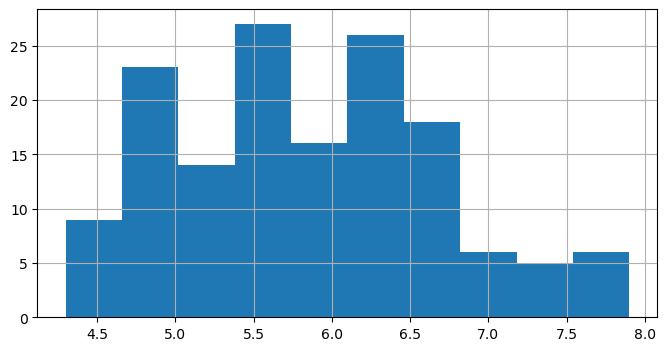

In [10]:
data['sepal_length'].hist(bins=10, figsize=(8,4))
plt.show()

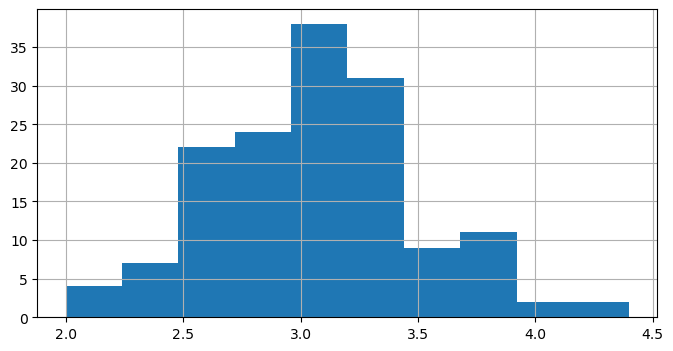

In [11]:
data['sepal_width'].hist(bins=10, figsize=(8,4))
plt.show()

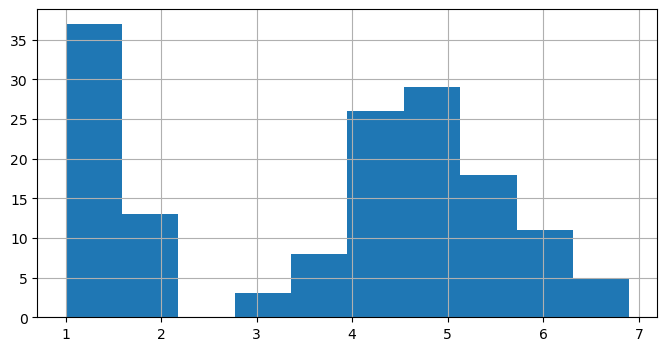

In [12]:
data['petal_length'].hist(bins=10, figsize=(8,4))
plt.show()

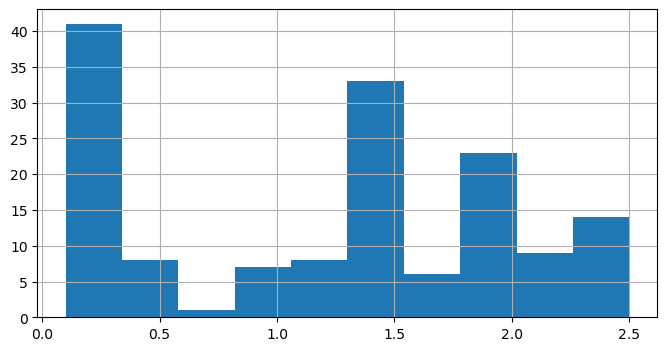

In [13]:
data['petal_width'].hist(bins=10, figsize=(8,4))
plt.show()

In [14]:
colors = ['green', 'blue', 'red']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

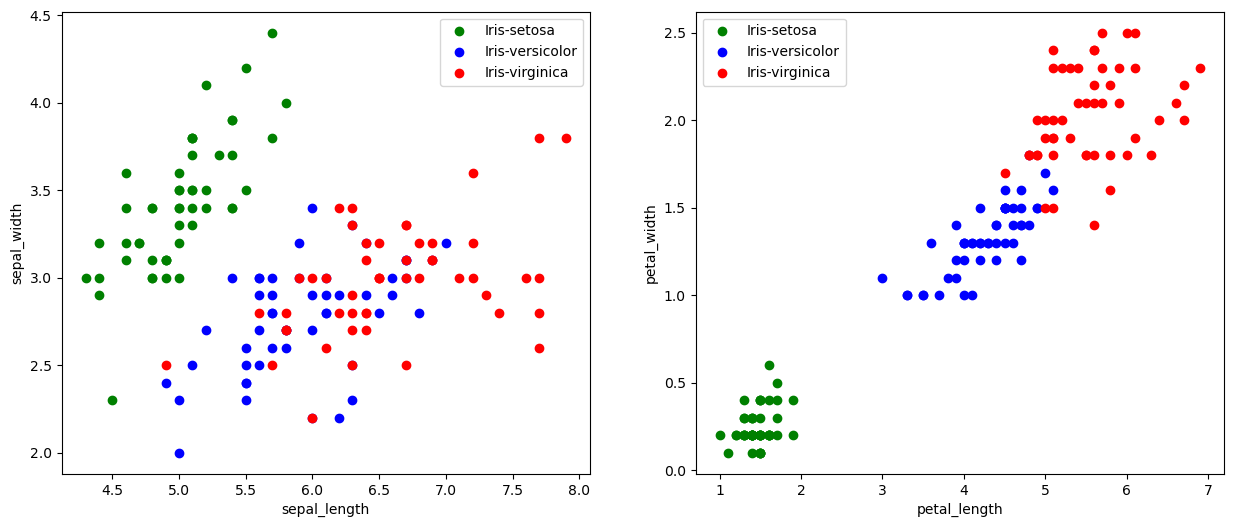

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

for i in range(3):
    x_sepal = data[data['species']==species[i]]
    ax1.scatter(x_sepal['sepal_length'], x_sepal['sepal_width'], c = colors[i], label = species[i])

ax1.set_xlabel('sepal_length')    
ax1.set_ylabel('sepal_width')
ax1.legend()


for i in range(3):
    x_petal = data[data['species']==species[i]]
    ax2.scatter(x_petal['petal_length'], x_petal['petal_width'], c = colors[i], label = species[i])

ax2.set_xlabel('petal_length')    
ax2.set_ylabel('petal_width')
ax2.legend()
plt.show()

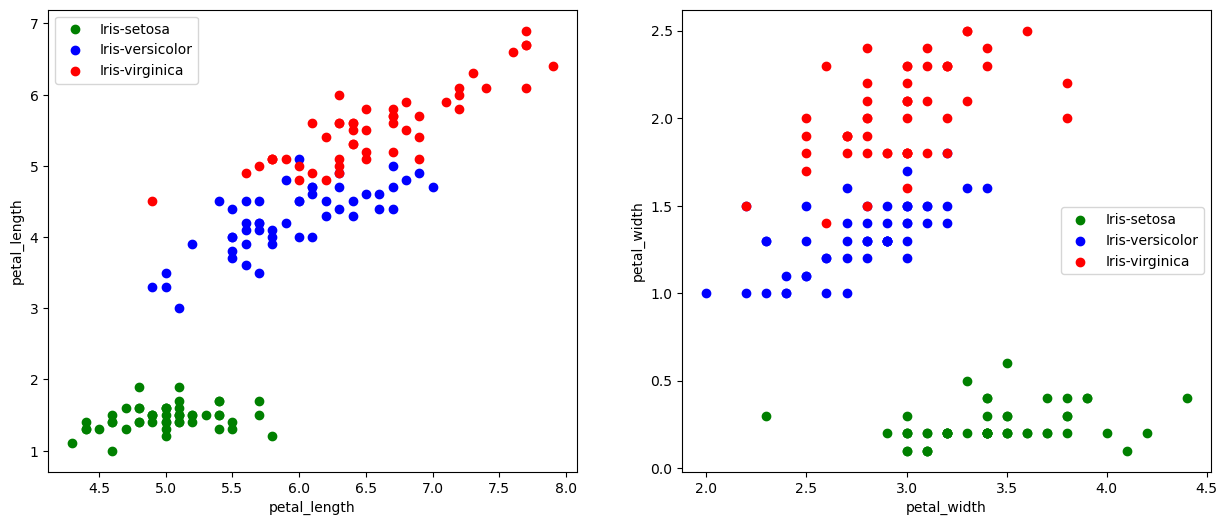

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

for i in range(3):
    x = data[data['species']==species[i]]
    ax1.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])

ax1.set_xlabel('petal_length')    
ax1.set_ylabel('petal_length')
ax1.legend()

for i in range(3):
    x = data[data['species']==species[i]]
    ax2.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])

ax2.set_xlabel('petal_width')    
ax2.set_ylabel('petal_width')
ax2.legend()
plt.show()

## Coorelation Matrix

In [17]:
data.corr()

C:\Users\fady\AppData\Local\Temp\ipykernel_21300\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\fady\AppData\Local\Temp\ipykernel_21300\356527402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


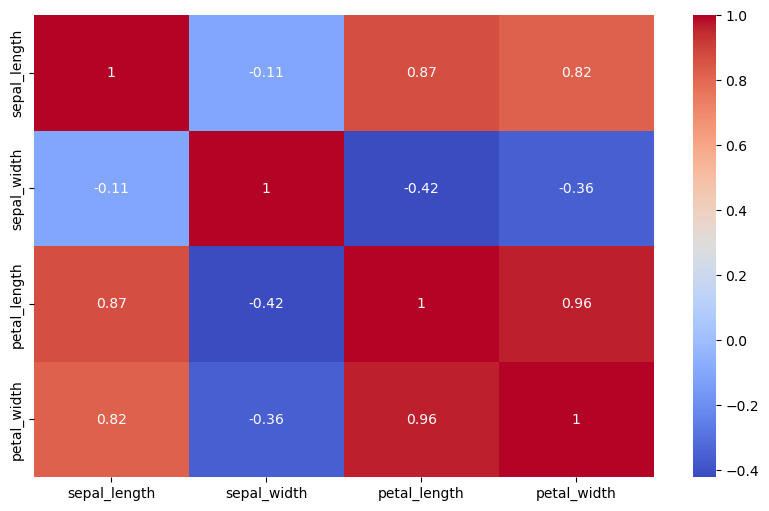

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True, ax=ax, cmap ='coolwarm')
plt.show()

## Label Encoder 

In [19]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Model Training

In [20]:
x = data.drop(columns=['species'])
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [21]:
# logistic Regression Model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
model = LogisticRegression(max_iter=1000)

# model training
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# print matric to get performance
print('Accuracy: ', model.score(x_test, y_test)*100,'%')

Accuracy:  97.77777777777777 %


In [23]:
# k_nearest neighbours (KNN) Model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
model = KNeighborsClassifier()

# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
# print matric to get performance
print('Accuracy: ', model.score(x_test, y_test)*100,'%')

Accuracy:  97.77777777777777 %


In [25]:
# Decision Tree Model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
model = DecisionTreeClassifier()

# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
# print matric to get performance
print('Accuracy: ', model.score(x_test, y_test)*100,'%')

Accuracy:  95.55555555555556 %
